In [1]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=7422fe45d0298735a06bed71eb414dc9acf9f0aaf84345cfb10d96d059d49266
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23599 sha256=c2ce6083e571050d6a80078da5a91503b73d02e0008bcf87290841aa407712c7
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built pyvis stringdist


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto

import pm4py

In [3]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# test gdrive
with open('/content/gdrive/My Drive/_ComputerScience/README.txt') as f:
  lines = f.readlines()
  print(lines)


['The tenth International Business Process Intelligence Challenge is again co-located with ICPM. This challenge provides participants with a real-life event log, and challenges them to analyze these data using whatever techniques available, focusing on one or more of the process owner’s questions or proving other unique insights into the process(es) captured in the event log.\n', '\n', 'In many organizations, staff members travel for work. They travel to customers, to conferences or to project meetings and these travels are sometimes expensive. As an employee of an organization, you do not have to pay for your own travel expenses, but the company takes care of them.\n', '\n', 'For this year’s Business Process Intelligence Challenge, we collected data from the reimbursement process at TU/e. The files contain data from 2017 (only two departments) and 2018 the full TU/e.\n', '\n', 'The data is split into travel permits and several request types, namely domestic declarations, international

In [6]:
import gzip
dom_decl_filename = '/content/gdrive/My Drive/_ComputerScience/BusinessInformationSystems/BPI_challenge_2020/DomesticDeclarations/DomesticDeclarations.xes.gz'
dom_decl_log = xes_importer.apply(dom_decl_filename)

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

In [7]:
print(dom_decl_log[0]) #prints the first trace of the log
print(dom_decl_log[0][0])

{'attributes': {'id': 'declaration 86791', 'concept:name': 'declaration 86791', 'BudgetNumber': 'budget 86566', 'DeclarationNumber': 'declaration number 86792', 'Amount': 26.85120450862128}, 'events': [{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'dd_declaration 86791_20', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2017, 1, 12, 17, 31, 22, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'UNDEFINED'}]}
{'id': 'st_step 86794_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Declaration SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2017, 1, 9, 9, 49, 50, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}


In [8]:
from pm4py.algo.filtering.log.variants import variants_filter

variant_dom_decl = variants_filter.get_variants(dom_decl_log)

In [9]:
variant_dom_decl

Output hidden; open in https://colab.research.google.com to view.

In [10]:
from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(dom_decl_log)

In [11]:
def analyse_variant(variants_count):
  count_sum = 0
  for variant in variants_count:
    count_sum += variant['count']
  print("sum = ", count_sum)

  handled_count = 0
  never_approved = 0
  rejected = 0
  resubmitted = 0
  double_payments = 0
  for variant in variants_count:
    #print(variant['variant'])
    if "Handled" in variant['variant']:
      handled_count += variant['count']
    if "APPROVED" not in variant['variant']:
      never_approved += variant['count']
    if "REJECTED" in variant['variant']:
      rejected += variant['count']
    # resubmit
    if variant['variant'].count('SUBMITTED') > 1:
      resubmitted += variant['count'] * (variant['variant'].count('SUBMITTED') - 1)
    if variant['variant'].count('Payment Handled') > 1:
      double_payments += variant['count']

  print('handled_count', handled_count)
  handled_ratio = handled_count / count_sum
  print("handled ratio = ", handled_ratio)
  print("never approved = ", never_approved)
  print("never approved ratio = ", never_approved / count_sum)
  print("REJECTED = ", rejected)
  print("resubmitted", resubmitted)
  print("double payment", double_payments)

In [12]:
analyse_variant(variants_count)

sum =  10500
handled_count 10044
handled ratio =  0.9565714285714285
never approved =  365
never approved ratio =  0.034761904761904765
REJECTED =  1301
resubmitted 1166
double payment 0


In [13]:
int_decl_filename = '/content/gdrive/My Drive/_ComputerScience/BusinessInformationSystems/BPI_challenge_2020/InternationalDeclarations/InternationalDeclarations.xes.gz'
int_decl_log = xes_importer.apply(int_decl_filename)

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [14]:
variant_int_decl = variants_filter.get_variants(int_decl_log)
variants_count_int = case_statistics.get_variant_statistics(int_decl_log)

In [15]:
analyse_variant(variants_count_int)

sum =  6449
handled_count 6187
handled ratio =  0.9593735462862459
never approved =  20
never approved ratio =  0.0031012560086835167
REJECTED =  1755
resubmitted 7915
double payment 0


In [18]:
dom_dec_log = log_converter.apply(dom_decl_log, variant=log_converter.Variants.TO_DATA_FRAME)

profile = dom_dec_log.groupby('case:concept:name').agg(
Activity = ('concept:name', 'count'),\
Activity_list = ('concept:name', lambda x: ','.join(x) ),\
Resource = ('org:resource', 'nunique'),\
Duration = ('time:timestamp', lambda x: x.max()- x.min()),\
)

#print(profile)
wrong_duration = profile[(profile['Duration'] < '0:10:0')]
print('wrong duration', wrong_duration)

short_activity_list = profile[(profile['Activity']) == 1]
print('short act list:', short_activity_list)

# question 1
mean_duration = profile[(profile['Duration'] > '0:0:0')].agg('mean')
print('mean dur = ', mean_duration)

wrong duration                     Activity                  Activity_list  Resource Duration
case:concept:name                                                             
declaration 100880         1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 101426         1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 101610         1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 101987         1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 102047         1  Declaration SAVED by EMPLOYEE         1   0 days
...                      ...                            ...       ...      ...
declaration 97401          1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 98055          1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 99093          1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 99493          1  Declaration SAVED by EMPLOYEE         1   0 days
declaration 99961          1  Declara

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


[1152673000000000  201143000000000  200876000000000  534259000000000
 1059925000000000  979824000000000  626223000000000  616499000000000
 1136153000000000  530737000000000]


TypeError: ignored

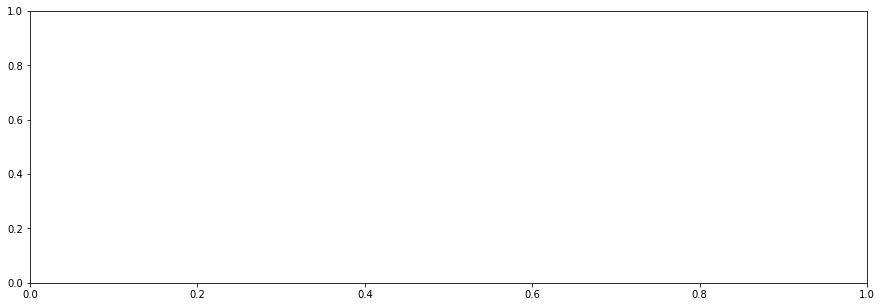

In [19]:
fig = plt.figure(figsize = (15, 5))
print(profile['Duration'].values[0:10])

plt.hist(profile['Duration'].values, color = 'orange')
#plt.xlabel('variants sorted by frequency')
#plt.ylabel('frequency')
plt.show()

In [ ]:
len(dom_decl_log)

10500

In [20]:
from pm4py.objects.petri_net.importer import importer as pnml_importer

In [21]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(dom_decl_log)

/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  after removing the cwd from sys.path.


replaying log with TBR, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

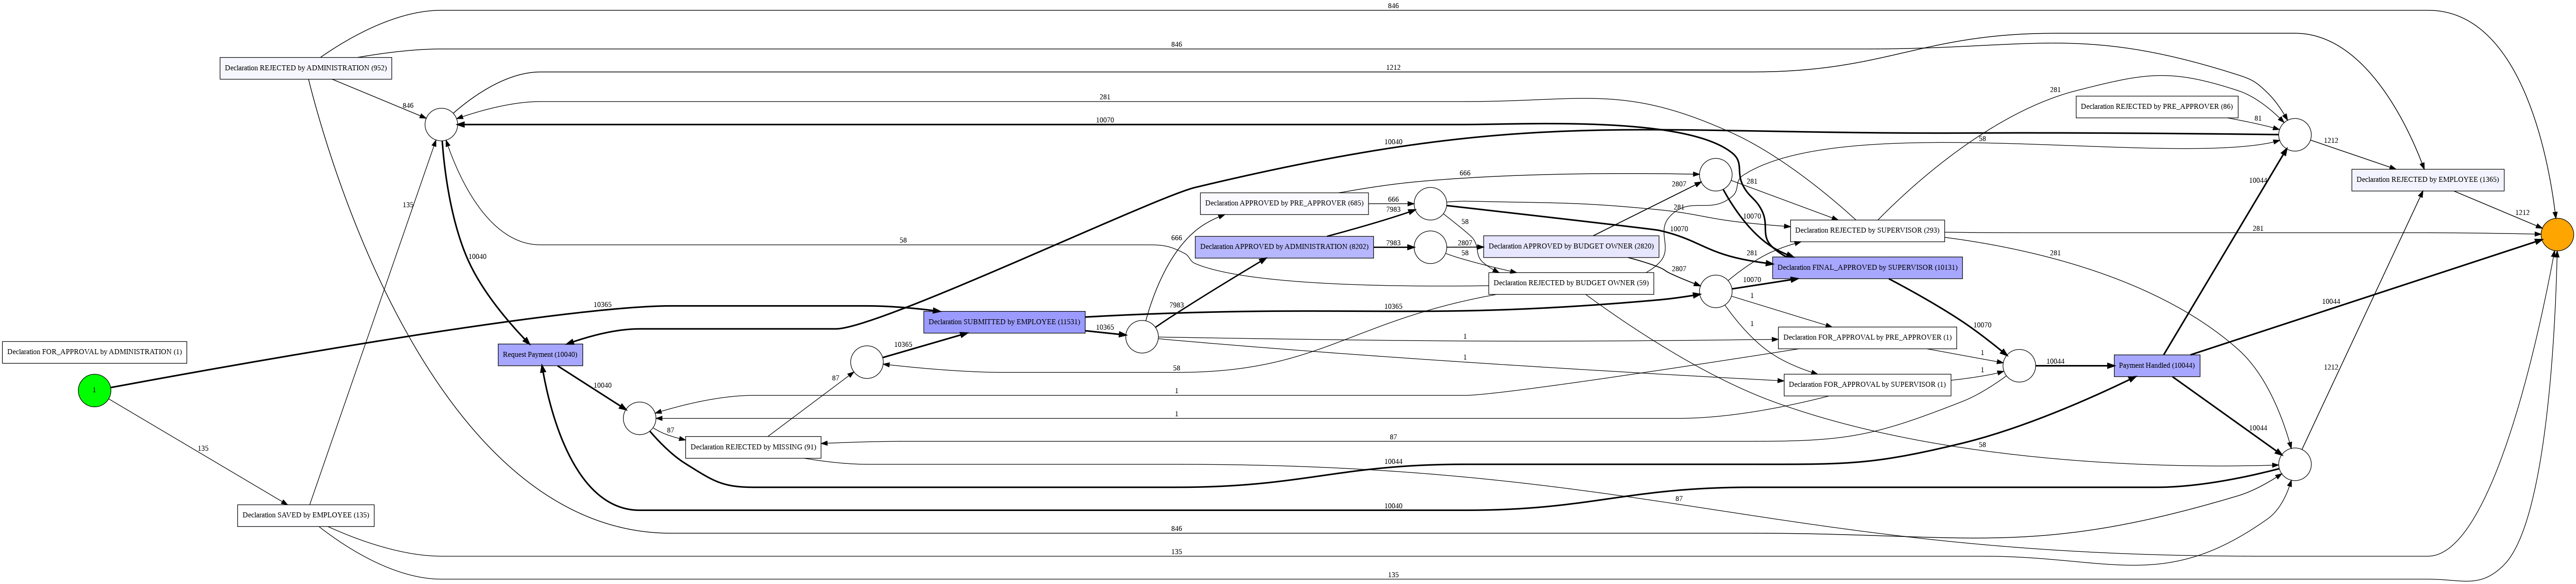

In [22]:
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=dom_decl_log)
pn_visualizer.view(gviz)

In [23]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness_alpha = replay_fitness_evaluator.apply(dom_decl_log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('fitness alpha miner:', round(fitness_alpha['average_trace_fitness'], 2))

replaying log with TBR, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

fitness alpha miner: 0.7


In [24]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec_alpha = precision_evaluator.apply(dom_decl_log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('precision alpha miner:', round(prec_alpha, 2))

replaying log with TBR, completed variants ::   0%|          | 0/324 [00:00<?, ?it/s]

precision alpha miner: 0.25
